Mounted at /content/drive


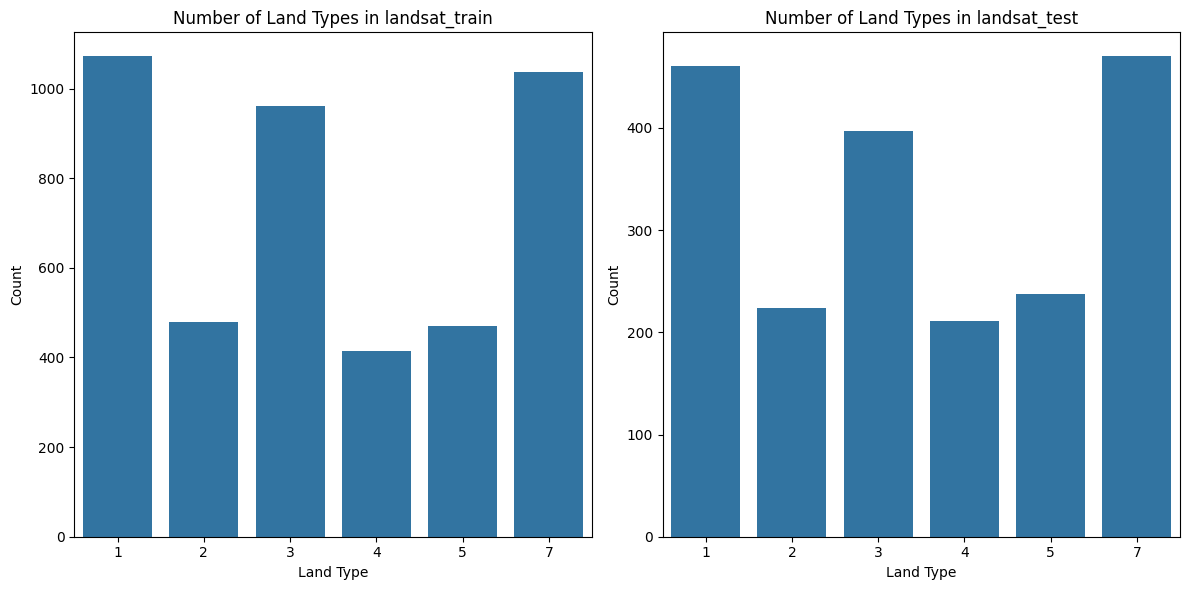

RandomForest Classifier for Landsat Data:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.98      0.97       224
           3       0.90      0.95      0.92       397
           4       0.80      0.64      0.71       211
           5       0.93      0.89      0.91       237
           7       0.87      0.91      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000

Voting Classifier for Landsat Data:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       461
           2       0.96      0.98      0.97       224
           3       0.87      0.93      0.90       397
           4       0.71      0.66      0.69       211
           5       0.94      0.85      0.89       237
           7       0.88      0.86      0.87       470


/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       762
           1       1.00      1.00      1.00       610

    accuracy                           1.00      1372
   macro avg       1.00      1.00      1.00      1372
weighted avg       1.00      1.00      1.00      1372



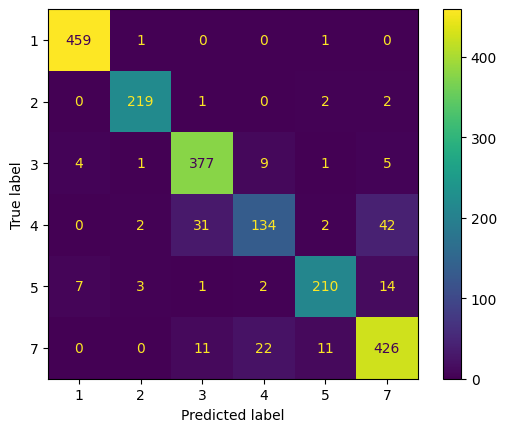

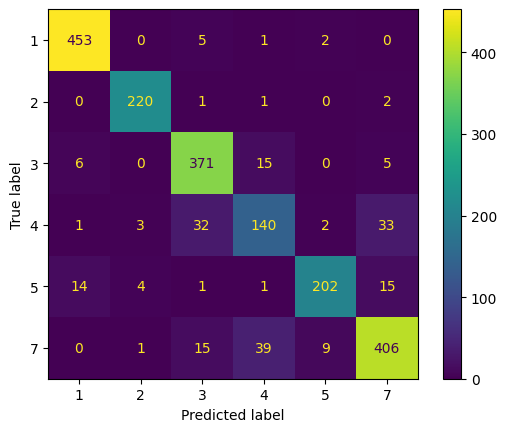

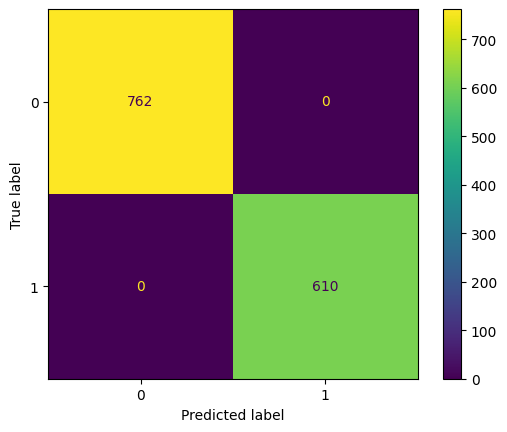

In [26]:
#MLA5_CWJ
#Imports
from google.colab import drive
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Attach Google Drive
drive.mount('/content/drive', force_remount=True)

#File paths
landsat_train_path = '/content/drive/MyDrive/landsat_train.csv'
landsat_test_path = '/content/drive/MyDrive/landsat_test.csv'
banknote_data_path = '/content/drive/MyDrive/banknote_authentication.csv'

def preprocess_and_evaluate_pipeline(x_train, y_train, x_test, y_test, classifier):
    #Preprocessing pipeline
    preprocessor = ColumnTransformer(transformers=[('num', MinMaxScaler(), x_train.columns)])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])

    #Train
    pipeline.fit(x_train, y_train)

    #Predictions
    y_pred = pipeline.predict(x_test)

    #Classification report
    print(classification_report(y_test, y_pred))

    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot()

#Acquire Data
landsat_train = pd.read_csv(landsat_train_path)
landsat_test = pd.read_csv(landsat_test_path)
banknote_data = pd.read_csv(banknote_data_path)

#Statistics and Visual Exploration
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=landsat_train, x='land_type')
plt.title('Number of Land Types in landsat_train')
plt.xlabel('Land Type')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=landsat_test, x='land_type')
plt.title('Number of Land Types in landsat_test')
plt.xlabel('Land Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#Train/Test for Landsat Data
x_train_landsat = landsat_train.drop(columns=['land_type'])
x_test_landsat = landsat_test.drop(columns=['land_type'])
y_train_landsat = landsat_train['land_type']
y_test_landsat = landsat_test['land_type']

#features and target variable for Banknote
x_banknote = banknote_data.drop(columns=['forgery'])
y_banknote = banknote_data[['forgery']]
#print(y_banknote.unique())

#RandomForest Classifier for Landsat
print("RandomForest Classifier for Landsat Data:")
preprocess_and_evaluate_pipeline(x_train_landsat, y_train_landsat, x_test_landsat, y_test_landsat, RandomForestClassifier())

#Voting Classifier for Landsat
print("Voting Classifier for Landsat Data:")
preprocess_and_evaluate_pipeline(x_train_landsat, y_train_landsat, x_test_landsat, y_test_landsat,
                                 VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                                              ('bag', BaggingClassifier()),
                                                              ('ada', AdaBoostClassifier())]))

#RandomForest Classifier for Banknote
print("RandomForest Classifier for Banknote Data:")
preprocess_and_evaluate_pipeline(x_banknote, y_banknote, x_banknote, y_banknote, RandomForestClassifier())
